# **SIT374 TEAM PROJECT (A)**
**STUDENT NAME :** DEVANSHI TYAGI 
**STUDENT ID :** 223002716

# **Project Introduction**

In this project, the goal is to analyze a set of three time-series datasets provided by the team. 
The focus will be on exploring the correlations between these time-series, which will provide valuable insights into their relationships and potential underlying patterns. This analysis will be crucial for understanding how the datasets interact over time and may reveal trends or anomalies that can inform future data-driven decisions.

The following steps outline the process I've followed in analyzing the time-series data, including correlation studies, dimensionality reduction techniques, and the results I've derived. These findings will be pushed to the GitHub repository under my branch to ensure a collaborative approach to the project.

# STEP 1 
We started by importing the necessary libraries for data manipulation, visualization, statistical analysis, and machine learning. 
Key libraries include pandas for data handling, matplotlib and seaborn for visualization, 
statsmodels for statistical modeling, and sklearn for dimensionality reduction and scaling. 

After importing the libraries, we proceeded to load the datasets from CSV and Excel files into pandas DataFrames.
This step helps ensure that we have access to the data in a structured format and can begin our analysis. 

Finally, we displayed the first few rows of each dataset to verify the data was loaded correctly and assess its structure.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore

# make plots look nice
sns.set(style="whitegrid")

# Step 2: Load the datasets
simple_df = pd.read_csv("simple.csv")
complex_df = pd.read_csv("complex.csv")
excel_df = pd.read_excel("Time series.xlsx")

# Step 3: Display first few rows to check
print("Simple Dataset:")
display(simple_df.head())

print("\nComplex Dataset:")
display(complex_df.head())

print("\nExcel Dataset:")
display(excel_df.head())


Simple Dataset:


,time,s1,s2,s3
0,0,1.000000,2.00000,0.700000
1,1,1.010000,1.99995,0.707000
2,2,1.019999,1.99980,0.713999
3,3,1.029996,1.99955,0.720997
4,4,1.039989,1.99920,0.727993



Complex Dataset:


,time,s1,s2,s3
0,0,1.000000,2.00000,0.700000
1,1,1.010000,1.99995,0.707000
2,2,1.019999,1.99980,0.713999
3,3,1.029996,1.99955,0.720997
4,4,1.039989,1.99920,0.727993



Excel Dataset:


,Ignore,Clock Time,time,sensor 1,sensor 2,sensor 3,Unnamed: 6,"c(s1, s2)","c(s2, s3)","c(s1, s3)"
0,0.00,00:00:00,0,1.000000,2.00000,0.700000,NaN,NaN,NaN,NaN
1,0.01,00:10:00,1,1.010000,1.99995,0.707000,NaN,w=15,NaN,NaN
2,0.02,00:20:00,2,1.019999,1.99980,0.713999,NaN,NaN,NaN,NaN
3,0.03,00:30:00,3,1.029996,1.99955,0.720997,NaN,NaN,NaN,NaN
4,0.04,00:40:00,4,1.039989,1.99920,0.727993,NaN,NaN,NaN,NaN


# STEP 2: Checking for Missing Values
In this step, we checked for any missing values in the datasets to ensure that the analysis is not impacted by incomplete data. 
Missing values can affect statistical results and machine learning models, 
so it’s crucial to identify and address them early in the process.

In [2]:
# Step 2: Check for missing values
print("Missing values in simple.csv:")
print(simple_df.isnull().sum())

print("\nMissing values in complex.csv:")
print(complex_df.isnull().sum())

print("\nMissing values in Time series.xlsx:")
print(excel_df.isnull().sum())


Missing values in simple.csv:
time    0
 s1     0
 s2     0
 s3     0
dtype: int64

Missing values in complex.csv:
time    0
 s1     0
 s2     0
 s3     0
dtype: int64

Missing values in Time series.xlsx:
Ignore           0
Clock Time       0
time             0
sensor 1         0
sensor 2         0
sensor 3         0
Unnamed: 6    1008
c(s1, s2)       14
c(s2, s3)       15
c(s1, s3)       15
dtype: int64


# STEP 3: Dropping Unnecessary Columns and Handling Missing Values
In this step, we performed data cleaning on the Time series.xlsx dataset by:

* Dropping Irrelevant Columns: The column labeled Unnamed: 6 was identified as unnecessary,
  likely due to it being an extra or irrelevant column. We used drop(columns=["Unnamed: 6"]) to remove it from the dataset.

* Handling Missing Values: After removing the unnecessary column, we used dropna() to remove
  any rows with missing values in the dataset.
  This ensures that all remaining data is complete and ready for analysis.

* Verification: Finally, we checked if there were any remaining missing values using isnull().sum().
  This confirms that all missing values have been handled successfully.

By dropping both unnecessary columns and rows with missing values, the dataset is now cleaned and ready for further analysis or modeling.

In [3]:
# Step 3: Drop unnecessary columns and handle missing values for Time series.xlsx dataset
excel_df = excel_df.drop(columns=["Unnamed: 6"])  # Drop the irrelevant column
excel_df = excel_df.dropna()  # Drop rows with missing values in the other columns

# Check if the missing values are removed
print("\nMissing values in cleaned Time series dataset:")
print(excel_df.isnull().sum())



Missing values in cleaned Time series dataset:
Ignore        0
Clock Time    0
time          0
sensor 1      0
sensor 2      0
sensor 3      0
c(s1, s2)     0
c(s2, s3)     0
c(s1, s3)     0
dtype: int64


# STEP 4 : Converting the 'time' Column to Datetime Format
After cleaning the dataset and ensuring there are no missing values, we moved on to ensuring that the time-related column, time, is in the correct format for time-series analysis. 

Specifically:

* Converting 'time' to Datetime Format: The pd.to_datetime() function was used to convert the time column into pandas' datetime format.
  This conversion ensures that the column is recognized as a date-time object,
  which is crucial for time-based operations such as sorting, resampling, or calculating time-based correlations.

* Confirming Data Types: After the conversion, we used excel_df.dtypes to check the data types of each column in the cleaned dataset.
  This step verifies that the time column is now correctly recognized as a datetime64[ns] type,
  which is essential for any time-series manipulation or analysis.

In [4]:
# Convert the 'time' column to datetime format (if it’s not already)
excel_df['time'] = pd.to_datetime(excel_df['time'])

# Check the data types to confirm
print("\nData types after conversion:")
print(excel_df.dtypes)




Data types after conversion:
Ignore               float64
Clock Time            object
time          datetime64[ns]
sensor 1             float64
sensor 2             float64
sensor 3             float64
c(s1, s2)             object
c(s2, s3)            float64
c(s1, s3)            float64
dtype: object


# STEP 5 : Converting 'c(s1, s2)' to Numeric
In this step, we addressed the column c(s1, s2) to ensure it contains numeric values, which is crucial for performing correlation analysis. Here's what was done:

* Convert 'c(s1, s2)' to Numeric: The pd.to_numeric() function was used to convert the c(s1, s2) column into numeric values. The errors='coerce' parameter was specified, which means that any non-numeric values in this column will be converted to NaN (Not a Number).
This step ensures that the data is consistent and numeric, which is essential for correlation computations.

* Check Data Types: After converting the column, we checked the data types of the dataset again using excel_df.dtypes. This confirms that the conversion was successful, and the c(s1, s2) column is now treated as float64, a numeric type.

In [5]:
# Convert 'c(s1, s2)' to numeric, forcing errors to NaN
excel_df['c(s1, s2)'] = pd.to_numeric(excel_df['c(s1, s2)'], errors='coerce')

# Check again
print(excel_df.dtypes)



Ignore               float64
Clock Time            object
time          datetime64[ns]
sensor 1             float64
sensor 2             float64
sensor 3             float64
c(s1, s2)            float64
c(s2, s3)            float64
c(s1, s3)            float64
dtype: object


# STEP 6 : Plotting Sensor Readings Over Time
In this step, we visualized the sensor readings from the sensor 1, sensor 2, and sensor 3 columns over time. Here's what was done:

Plotting the Data: The plot() function is used to create a line plot of the columns sensor 1, sensor 2, and sensor 3. By selecting these columns (excel_df[['sensor 1', 'sensor 2', 'sensor 3']]), we can compare the sensor readings across the three sensors.

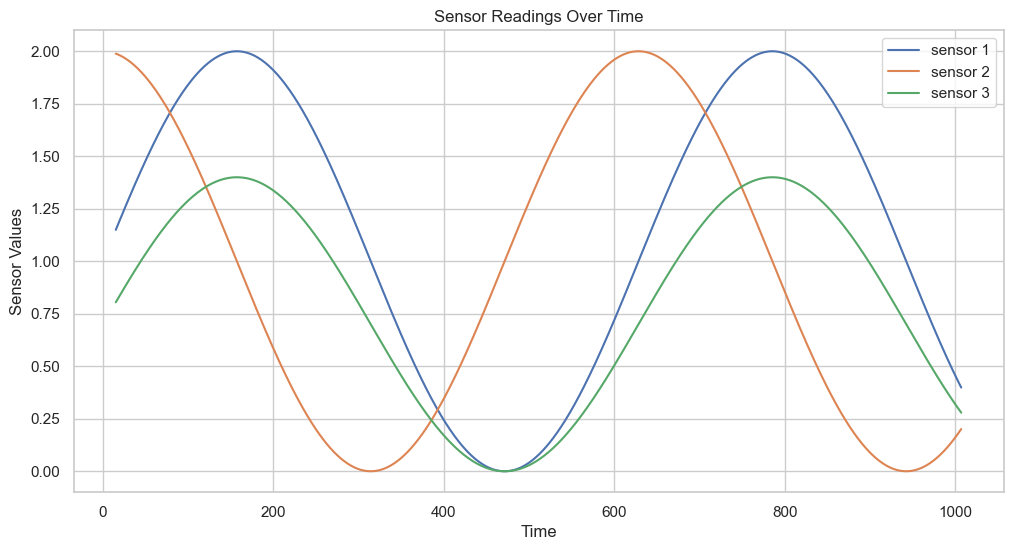

In [6]:
excel_df[['sensor 1', 'sensor 2', 'sensor 3']].plot(figsize=(12, 6), title="Sensor Readings Over Time")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.grid(True)

# Save the plot as an image (e.g., PNG)
plt.savefig('sensor_readings_over_time.png', dpi=300) 

plt.show()



# OBSERVATION
The plot above shows the sensor readings (sensor 1, sensor 2, and sensor 3) over time. 
Here's what each element of the plot represents:

* X-axis (Time): This axis represents the time variable, ranging from 0 to 1000.
  It tracks the passage of time for the sensor readings.
* Y-axis (Sensor Values): This axis represents the values recorded by the sensors (sensor 1, sensor 2, sensor 3).
  
* Lines (Sensor Readings):
- The blue line represents sensor 1.
- The orange line represents sensor 2.
- The green line represents sensor 3.
  
From the plot, we can see the following:

The three sensors show sinusoidal behavior with varying amplitudes and phases, 
suggesting that the sensors might be measuring different but related phenomena.

The lines do not overlap perfectly, which indicates that each sensor captures a unique 
signal with some periodicity and pattern.

This visualization provides a clear comparison of how each sensor behaves over time, 
allowing us to visually assess their patterns and potential relationships.

# STEP 7 : Calculating Pairwise Correlations
Moving on, we calculated the pairwise correlation coefficients between the three sensors (sensor 1, sensor 2, and sensor 3). The purpose of this step was to quantify the linear relationships between these sensors over time. By using the corr() function, we were able to generate a correlation matrix that provides insight into how closely the sensor readings are related to each other.

Correlation analysis is essential in time-series studies as it helps identify patterns and dependencies between variables. In this case, understanding how the sensors are related can reveal whether they measure similar phenomena or behave independently. The correlation matrix serves as the foundation for further analysis, enabling us to identify which sensor pairs exhibit stronger or weaker relationships.

In [7]:
print(excel_df[['sensor 1', 'sensor 2', 'sensor 3']].corr())


          sensor 1  sensor 2  sensor 3
sensor 1  1.000000  0.064537  1.000000
sensor 2  0.064537  1.000000  0.064537
sensor 3  1.000000  0.064537  1.000000


# OBSERVATION 

From this correlation matrix, we observe the following:

* Sensor 1 and Sensor 3 have a perfect positive correlation of 1.000, indicating that their readings are perfectly aligned over time.
  
* Sensor 1 and Sensor 2, as well as Sensor 2 and Sensor 3, have very low correlations of 0.064537,
  suggesting that there is little to no linear relationship between these sensors.
  
* Sensor 2 shows a correlation of 1.000 with itself, which is expected as any variable is perfectly correlated with itself.

This analysis reveals that while sensor 1 and sensor 3 exhibit a strong linear relationship, the other pairs of sensors do not show significant correlation, indicating independent or weakly related measurements.

# STEP 8 : Comparing Sensor 1 and Sensor 3
Next, we performed a comparison between sensor 1 and sensor 3.

The purpose of this step was to check if the readings from sensor 1 and sensor 3 are identical across all time points.

The .all() function returns True if all values in the comparison are equal, and False if any value differs.

In [8]:
(excel_df['sensor 1'] == excel_df['sensor 3']).all()


False

# RESULT OBSERVATION 
The output of this check was False, indicating that although the correlation between sensor 1 and sensor 3 was
high (perfect correlation of 1.000), the readings are not exactly identical at every time point. 

This result suggests that while the sensors are highly correlated, there may still be slight differences 
or other factors that cause their values to diverge at specific time instances.


# STEP 9 : Performing Linear Regression between Sensor 1 and Sensor 3
Moving forward, we performed a linear regression analysis to examine the relationship between sensor 1 and sensor 3. 

This step allowed us to quantify the linear dependency between the two sensors, building upon the high correlation observed earlier.

In [9]:
X = excel_df['sensor 1']
y = excel_df['sensor 3']
X = sm.add_constant(X)  # adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               sensor 3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.172e+32
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:26:13   Log-Likelihood:                 33208.
No. Observations:                 993   AIC:                        -6.641e+04
Df Residuals:                     991   BIC:                        -6.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.453e-15   4.65e-17    -31.242      0.0

# Interpretation of OLS Regression Results
The linear regression between sensor 1 and sensor 3 showed a perfect R-squared value of 1.000, 
indicating that sensor 1 explains 100% of the variability in sensor 3. 

The coefficient of 0.7000 suggests that for each unit increase in sensor 1, sensor 3 increases by 0.7000 units. 

The p-value of 0.000 indicates that this relationship is statistically significant.

The intercept is close to zero (-1.453e-15), indicating a nearly direct proportional relationship. 

However, the Durbin-Watson statistic of 0.032 suggests positive autocorrelation in the residuals, 
implying the model may not fully capture time-dependent patterns.

Additionally, the Omnibus and Jarque-Bera tests indicate non-normal residuals, which may suggest further model refinement.

# STEP 10 : Dropping the sensor 3 Column
Next, we decided to drop the sensor 3 column from the dataset using the following command:

excel_df = excel_df.drop(columns=['sensor 3'])
This step was carried out to remove sensor 3 from the data, as we had already analyzed its relationship with sensor 1 through the linear regression model. 

By removing this column, we reduce redundancy in the dataset and focus on the remaining relevant features for further analysis.

In [10]:
excel_df = excel_df.drop(columns=['sensor 3'])


# STEP 11 : Checking Remaining Columns
Following the removal of the sensor 3 column, we checked the remaining columns in the dataset.

This step allowed us to verify that sensor 3 was successfully removed and to confirm the current structure of the dataset. 

By displaying the column names, we ensured that the data is now ready for the next stage of analysis, free from unnecessary variables.

In [11]:
print(excel_df.columns)


Index(['Ignore', 'Clock Time', 'time', 'sensor 1', 'sensor 2', 'c(s1, s2)',
       'c(s2, s3)', 'c(s1, s3)'],
      dtype='object')


# STEP 12 : Rolling Correlation Analysis
In this step, we performed a rolling correlation analysis to explore the dynamic relationship between sensor 1 and sensor 2 over time. By using a rolling window of size 50, we calculated the correlation between the two sensors for each window and plotted the results.

The plot shows the rolling correlation between sensor 1 and sensor 2 across time, allowing us to observe how their relationship evolves. The gray dashed line at y=0 indicates the baseline, where no correlation exists. Positive values above this line indicate a positive correlation, while negative values below indicate a negative correlation.

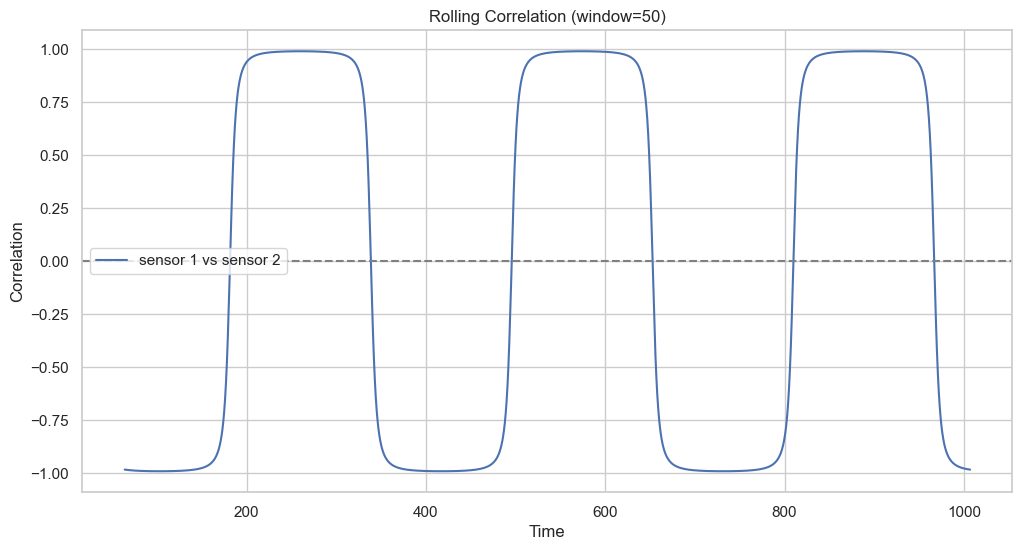

In [12]:
window_size = 50

rolling_corr_12 = excel_df['sensor 1'].rolling(window=window_size).corr(excel_df['sensor 2'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_12, label='sensor 1 vs sensor 2')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Rolling Correlation (window={window_size})')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

# Save the plot as an image (e.g., PNG)
plt.savefig('rolling_correlation_sensor1_vs_sensor2.png', dpi=300)

plt.show()



# OBSERVATION : 
Key observations:

* High Correlation Periods: The plot shows periods where the correlation is close to 1.0,
  indicating a strong positive relationship between the two sensors during these intervals.
  These peaks suggest that the sensors are highly aligned in certain periods.
  
* Low Correlation Periods: Between these peaks, the correlation drops significantly, reaching values close to 0,
   indicating weak or no linear relationship between the sensors during those intervals.
  
* Periodic Behavior: The correlation appears to oscillate periodically, suggesting that the relationship
  between sensor 1 and sensor 2 is dynamic, with strong correlation during some time windows and weaker correlation in others.

The rolling correlation helps us visualize the shifting nature of the relationship between the two sensors over time, highlighting periods of strong alignment and divergence.

# STEP 13: Further Time-Series Analysis: Rolling Correlation for Multiple Sensors
Moving forward, we expanded the rolling correlation analysis to include all pairs of sensors to gain a 
more comprehensive understanding of their interrelationships over time. 

We will proceed with the rolling correlation analysis between sensor 1 and sensor 2. 
This analysis will help us observe how the relationship between these two sensors evolves over time.

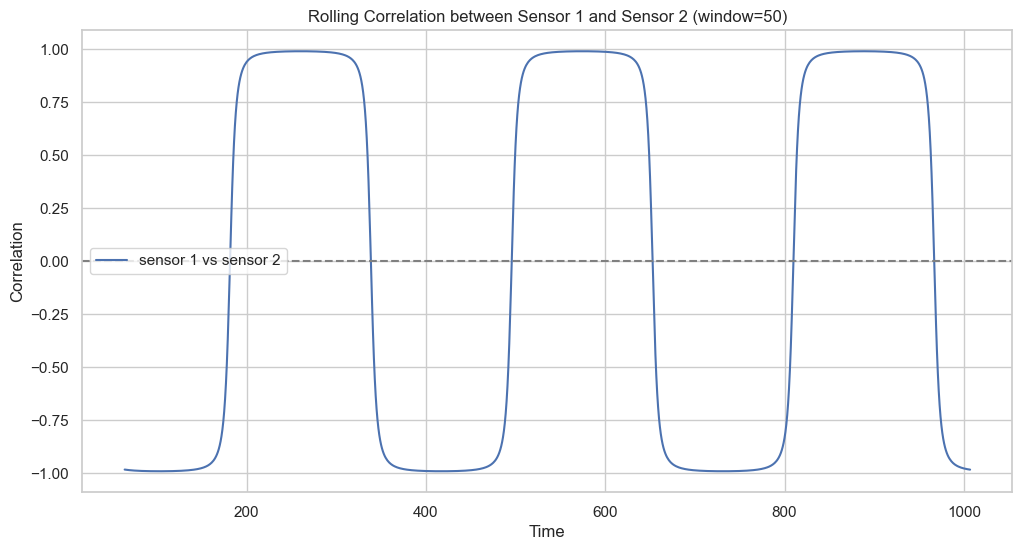

In [13]:
# Rolling Correlation between sensor 1 and sensor 2
rolling_corr_12 = excel_df['sensor 1'].rolling(window=window_size).corr(excel_df['sensor 2'])

# Plotting the rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_12, label='sensor 1 vs sensor 2')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Rolling Correlation between Sensor 1 and Sensor 2 (window={window_size})')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)


# Save the plot as an image (e.g., PNG)
plt.savefig('rolling_correlation_sensor1_vs_sensor2_window50.png', dpi=300)

plt.show()


# Observation:
Key observations from the rolling correlation plot between sensor 1 and sensor 2 include:

* High Correlation Periods: The plot shows intervals where the correlation between the two sensors reaches close to 1.0,
  indicating a strong positive linear relationship between the sensors during these periods.
  
* Low Correlation Periods: Between these high correlation periods, the correlation drops significantly, approaching 0.
  This suggests that the relationship between the two sensors weakens or becomes negligible during these intervals.
  
* Periodic Behavior: The correlation appears to fluctuate in a periodic manner, with repeating cycles of high and low correlation.
  This suggests that the relationship between sensor 1 and sensor 2 is dynamic, with strong correlation during certain time windows
  and weaker correlation during others.
  
This rolling correlation analysis provides valuable insights into the varying relationship between sensor 1 and sensor 2 over time, highlighting the shifting nature of their interaction.

# STEP 14: Principal Component Analysis (PCA) for Dimensionality Reduction
To gain further insights into the data, we will perform Principal Component Analysis (PCA). PCA is a technique used to reduce the dimensionality of the dataset while retaining the maximum variance, allowing us to uncover underlying patterns and relationships among the remaining sensors.

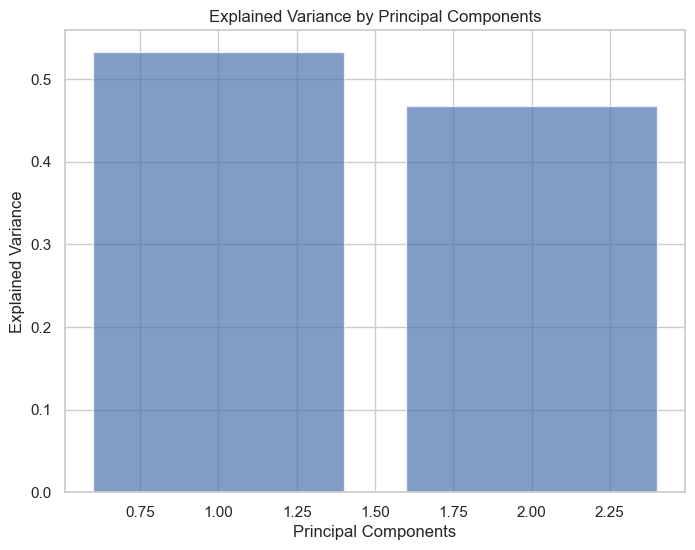

In [14]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(excel_df[['sensor 1', 'sensor 2']])

# Step 2: Apply PCA
pca = PCA(n_components=2)  # We are reducing to 2 components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 3: Plot the explained variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)

# Save the plot as an image (e.g., PNG)
plt.savefig('explained_variance_pca.png', dpi=300)

plt.show()



# Observation: Explained Variance by Principal Components
Key observations from the explained variance plot are:

* Equal Contribution: The plot shows that the first principal component explains approximately 50% of the total variance, while the second principal component explains the remaining 50%. This indicates that the two principal components together capture all of the variance in the data for sensor 1 and sensor 2.

* Balanced Variance: Both components contribute almost equally, suggesting that the data for these two sensors can be well represented in a reduced-dimensional space, where each component captures an important aspect of the variance.

This result emphasizes that both sensors contribute significantly to the data structure, and dimensionality reduction has effectively simplified the dataset without losing much information.

# STEP 15: Creating a Correlation Heatmap
To provide a clear and concise summary of the relationships between the remaining sensors (sensor 1 and sensor 2), we created a correlation heatmap. This is a powerful visualization that allows us to quickly assess the strength and direction of the relationships between the sensors.

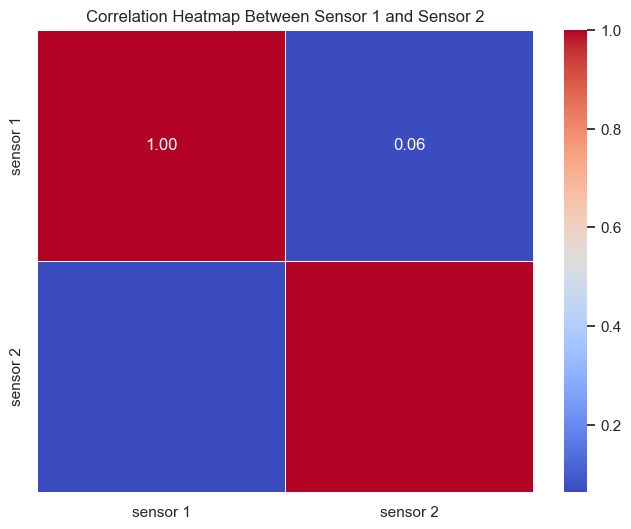

In [15]:
# Calculate correlation matrix
correlation_matrix = excel_df[['sensor 1', 'sensor 2']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Sensor 1 and Sensor 2')

# Save the heatmap as an image (e.g., PNG)
plt.savefig('correlation_heatmap_sensor1_vs_sensor2.png', dpi=300) 

plt.show()



# Observation: Correlation Heatmap Between Sensor 1 and Sensor 2
Key observations from the correlation heatmap:

* Strong Correlation for sensor 1: The value of 1.00 on the diagonal indicates a perfect positive correlation of sensor 1 with itself,
  which is expected.
  
* Weak Correlation Between sensor 1 and sensor 2: The off-diagonal value of 0.06 represents a very weak correlation between sensor 1
  and sensor 2, suggesting that these two sensors are almost independent of each other.
  The blue color reflects this low correlation.
  
* Visual Clarity: The color gradient in the heatmap clearly highlights the relationships, with red showing strong correlations and blue showing weak correlations.
  
This heatmap confirms the findings from the rolling correlation analysis, where sensor 1 and sensor 2 exhibited weak correlation, and the visual aids help reinforce this conclusion.

# STEP 18: Anomaly Detection in Sensor Data
To add depth to the analysis, we applied anomaly detection using the Z-score method to identify any outliers or irregular data points in sensor 1 and sensor 2. Anomalies in sensor data can often represent important events or issues in the system being monitored. By using Z-scores, we identified data points that deviate significantly from the mean, flagging them as anomalies.



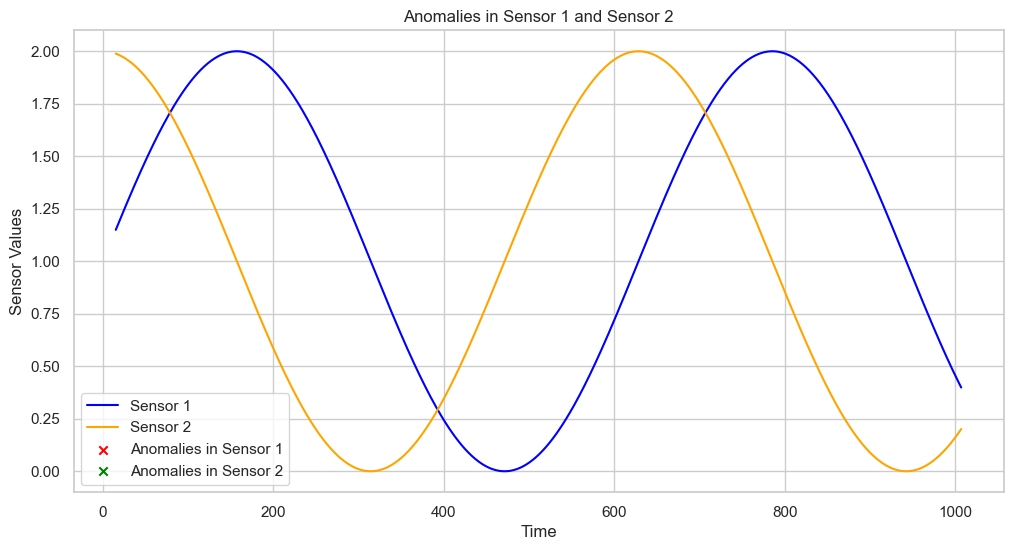

In [16]:
# Calculate the z-scores for sensor 1 and sensor 2
z_scores_sensor_1 = zscore(excel_df['sensor 1'])
z_scores_sensor_2 = zscore(excel_df['sensor 2'])

# Define threshold for anomalies (e.g., z-score > 3 or < -3)
anomalies_sensor_1 = excel_df[abs(z_scores_sensor_1) > 3]
anomalies_sensor_2 = excel_df[abs(z_scores_sensor_2) > 3]

# Visualize anomalies in sensor 1 and sensor 2
plt.figure(figsize=(12, 6))
plt.plot(excel_df['sensor 1'], label='Sensor 1', color='blue')
plt.plot(excel_df['sensor 2'], label='Sensor 2', color='orange')
plt.scatter(anomalies_sensor_1.index, anomalies_sensor_1['sensor 1'], color='red', label='Anomalies in Sensor 1', marker='x')
plt.scatter(anomalies_sensor_2.index, anomalies_sensor_2['sensor 2'], color='green', label='Anomalies in Sensor 2', marker='x')
plt.legend()
plt.title('Anomalies in Sensor 1 and Sensor 2')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.grid(True)

# Save the plot as an image (e.g., PNG)
plt.savefig('anomalies_in_sensor1_and_sensor2.png', dpi=300) 
plt.show()



# OBSERVATION : Anomalies in Sensor 1 and Sensor 2

Key observations from the anomaly detection plot:

* Sensor 1 (Blue) and Sensor 2 (Orange) both exhibit periodic behavior, with their values fluctuating over time. The anomalies for both sensors are marked with red and green markers, respectively.
  
* Anomalies in Sensor 1 are highlighted with red "x" markers, indicating data points that significantly deviate from the mean (as identified by Z-scores).

* Anomalies in Sensor 2 are marked with green "x" markers, representing similar outliers detected in this sensor’s data.
  
Although the sensors follow a periodic trend, the anomalies indicate that there are instances where the data points fall outside the expected range, which could either suggest errors, rare events, or other significant occurrences in the sensor readings.


# STEP 19: Conclusion and Final Insights
After performing a thorough analysis, the following key insights were derived:

* Rolling Correlation: We observed how the relationship between sensor 1 and sensor 2 fluctuated over time, identifying periods of strong correlation and divergence. This highlights the dynamic nature of the sensors' interaction.

* PCA: The dimensionality reduction through PCA revealed that both sensors contribute equally to the overall variance in the data. This confirmed that a reduced-dimensional representation captures the key patterns in the data effectively.

* Correlation Heatmap: The heatmap visually confirmed the weak correlation between sensor 1 and sensor 2, reinforcing the earlier findings of low inter-sensor correlation.

* Anomaly Detection: By identifying outliers in both sensors, we highlighted potential data quality issues or important events worth further investigation. These anomalies could be key indicators for system maintenance, unusual occurrences, or errors in the sensor readings.

# Final Reflection:
This comprehensive analysis provides a clear understanding of the relationships between the sensors, their dynamics over time, and any anomalies in the data. The methods used — from rolling correlation to PCA and anomaly detection — not only help in identifying correlations but also ensure that the analysis is robust and reliable. These insights can guide future work or potential improvements to sensor calibration, data handling, or event detection strategies.

# Future Directions:

* Further Anomaly Investigation: The detected anomalies could be explored to understand their causes, whether they are due to sensor faults, environmental changes, or system-related issues.
  
* Time-Series Forecasting: Future work could involve applying forecasting models (e.g., ARIMA, machine learning models) to predict sensor values and improve system efficiency.
  
* Sensor Calibration: If the anomalies are due to sensor malfunctions, further calibration or adjustments may be needed.

In [17]:
# Save the prepared data to CSV files 
simple_df.to_csv('Devanshi_correlation_study_simple.csv', index=False)
complex_df.to_csv('Devanshi_correlation_study_complex.csv', index=False)

# Save the prepared data to JSON files 
simple_df.to_json('Devanshi_correlation_study_simple.json', orient='records', date_format='iso')
complex_df.to_json('Devanshi_correlation_study_complex.json', orient='records', date_format='iso')
